In [45]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Loading the data

In [108]:
g_df=pd.read_csv("C:\\Users\\Mani\\Desktop\\Project\\Gold_data.csv")

In [109]:
g_df.head()

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


In [110]:
g_df.set_index('date',inplace=True)

# Train Test split :

In [111]:
# Diving data into 80:20 ratio

train=g_df.iloc[0:1745]
test=g_df.iloc[1745:]

# Simple Exponential smoothing :

In [112]:
# Error calculation 

def MAPE(pred,org):
    for i in range(0,len(pred)):
        tot=abs((org[i]-pred[i])/org[i])
    return np.mean(tot)

In [113]:
# Using different smoothing levels :

import numpy as np
x=np.arange(0.1,1,0.9/10)
for i in x :
    ses_model = SimpleExpSmoothing(train["price"]).fit(smoothing_level=i)
    pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
    score=MAPE(pred_ses,test.price) 
    print("smoothing_level ",i,"-->","MAPE Error",score)

smoothing_level  0.1 --> MAPE Error 0.0014577627589387227
smoothing_level  0.19 --> MAPE Error 0.009898204867478007
smoothing_level  0.28 --> MAPE Error 0.024575730266830065
smoothing_level  0.37 --> MAPE Error 0.03651245379380234
smoothing_level  0.45999999999999996 --> MAPE Error 0.04378562453106532
smoothing_level  0.5499999999999999 --> MAPE Error 0.04702763769673439
smoothing_level  0.64 --> MAPE Error 0.047429597223660296
smoothing_level  0.73 --> MAPE Error 0.046091034519255204
smoothing_level  0.82 --> MAPE Error 0.04390055441727743
smoothing_level  0.9099999999999999 --> MAPE Error 0.041581863574083826


- smoothing level of 0.1 has the least error 

In [114]:
# Using smoothing level of 0.1 

ses_model = SimpleExpSmoothing(train["price"]).fit(smoothing_level=0.1)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_ses,test.price) 


0.0014577627589387227

In [115]:
pred_ses

2020-10-11    4352.836166
2020-10-12    4352.836166
2020-10-13    4352.836166
2020-10-14    4352.836166
2020-10-15    4352.836166
                 ...     
2021-12-17    4352.836166
2021-12-18    4352.836166
2021-12-19    4352.836166
2021-12-20    4352.836166
2021-12-21    4352.836166
Freq: D, Length: 437, dtype: float64

In [116]:
p=pred_ses.values

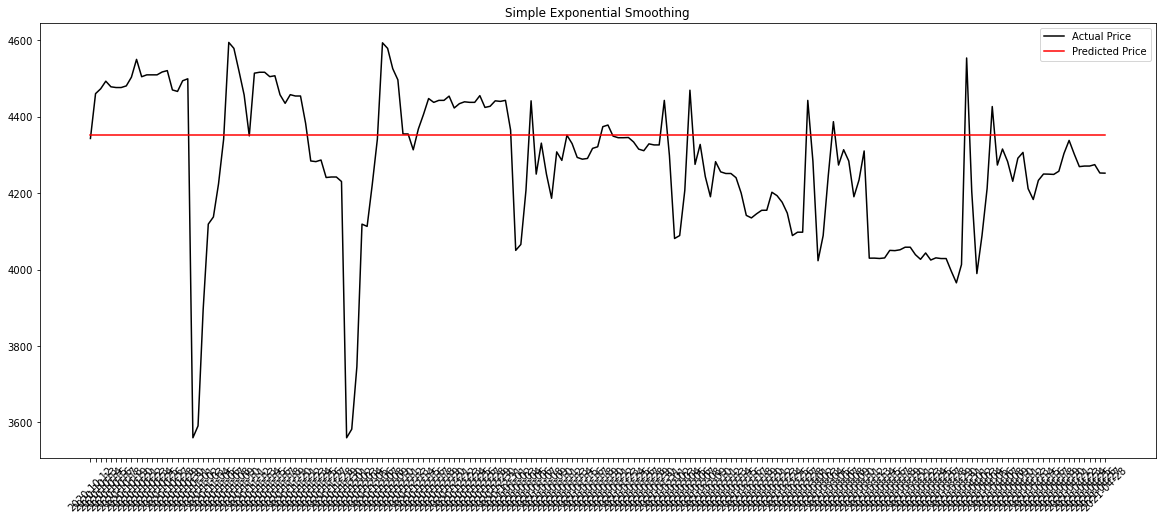

In [101]:
plt.figure(figsize=(20,8))
plt.title("Simple Exponential Smoothing")
plt.xticks(rotation=45)
plt.plot(test.price[1:200], color='black',label='Actual Price')
plt.plot(p[1:200],color='red', label='Predicted Price')
plt.legend()

- In simple exponential smoothing , though we got the MAPE value to be 3% , the predictions are not as expected

# Holt Exponential :

In [117]:

# Using different smoothing levels and smoothing slopes:

import numpy as np
alphas=np.arange(0.1,1,0.9/10)
betas=np.arange(0.1,1,0.9/10)

for i in alphas :
    for j in betas:
        hw_model = Holt(train.price).fit(smoothing_level=i, smoothing_slope=j)
        pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
        score=MAPE(pred_hw,test.price)
        print("smoothing_level ",i," smoothing_slope",j,"-->","MAPE Error",score) 

smoothing_level  0.1  smoothing_slope 0.1 --> MAPE Error 0.51351193015992
smoothing_level  0.1  smoothing_slope 0.19 --> MAPE Error 0.6778662998433912
smoothing_level  0.1  smoothing_slope 0.28 --> MAPE Error 0.6480205399805659
smoothing_level  0.1  smoothing_slope 0.37 --> MAPE Error 1.9031342295115703
smoothing_level  0.1  smoothing_slope 0.45999999999999996 --> MAPE Error 7.314193333005992
smoothing_level  0.1  smoothing_slope 0.5499999999999999 --> MAPE Error 12.304786787188968
smoothing_level  0.1  smoothing_slope 0.64 --> MAPE Error 15.109141388507428
smoothing_level  0.1  smoothing_slope 0.73 --> MAPE Error 16.02334560215705
smoothing_level  0.1  smoothing_slope 0.82 --> MAPE Error 16.35268732931482
smoothing_level  0.1  smoothing_slope 0.9099999999999999 --> MAPE Error 17.052283660440327
smoothing_level  0.19  smoothing_slope 0.1 --> MAPE Error 0.4716617219530728
smoothing_level  0.19  smoothing_slope 0.19 --> MAPE Error 2.8552256734510286
smoothing_level  0.19  smoothing_slope

smoothing_level  0.9099999999999999  smoothing_slope 0.9099999999999999 --> MAPE Error 12.963753483031999


- We got the least MAPE for smoothing_level  0.1  smoothing_slope 0.19

In [118]:
hw_model = Holt(train.price).fit(smoothing_level=0.1, smoothing_slope=0.19)
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hw,test.price)

0.6778662998433912

In [119]:
pred_hw

2020-10-11    4210.690115
2020-10-12    4204.243932
2020-10-13    4197.797748
2020-10-14    4191.351565
2020-10-15    4184.905381
                 ...     
2021-12-17    1425.938862
2021-12-18    1419.492678
2021-12-19    1413.046495
2021-12-20    1406.600311
2021-12-21    1400.154128
Freq: D, Length: 437, dtype: float64

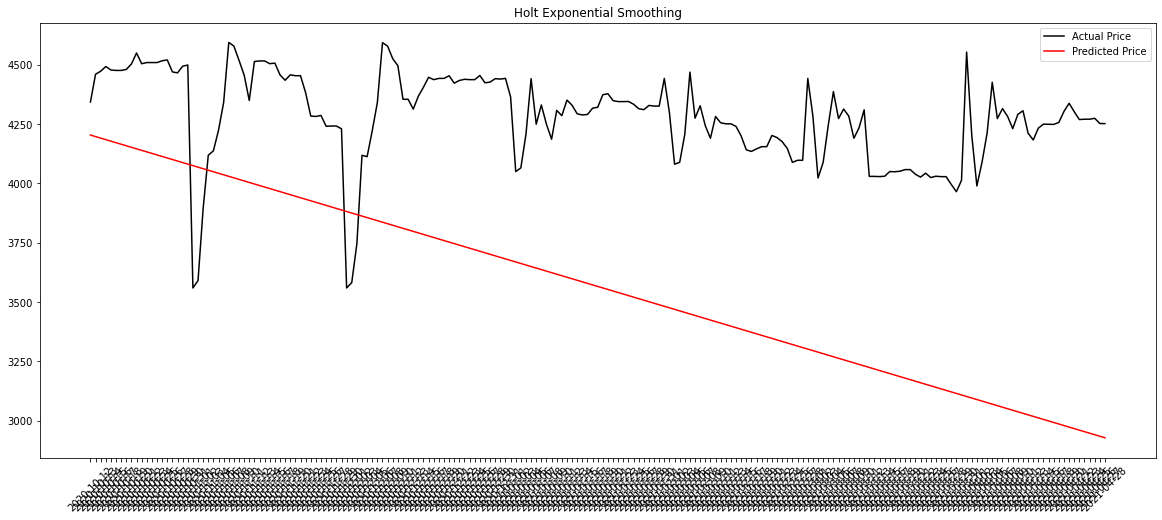

In [120]:
plt.figure(figsize=(20,8))
plt.title("Holt Exponential Smoothing")
plt.xticks(rotation=45)
plt.plot(test.price[1:200], color='black',label='Actual Price')
plt.plot(pred_hw.values[1:200],color='red', label='Predicted Price')
plt.legend()

- In holt exponential smoothing , we are able to predict the price in a better way.

### Holts winter exponential smoothing with additive seasonality and additive trend

In [121]:
hwe_model_add_add = ExponentialSmoothing(train["price"],seasonal="add",trend="add",seasonal_periods=30).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_add_add,test.price) 

0.8290807249907554

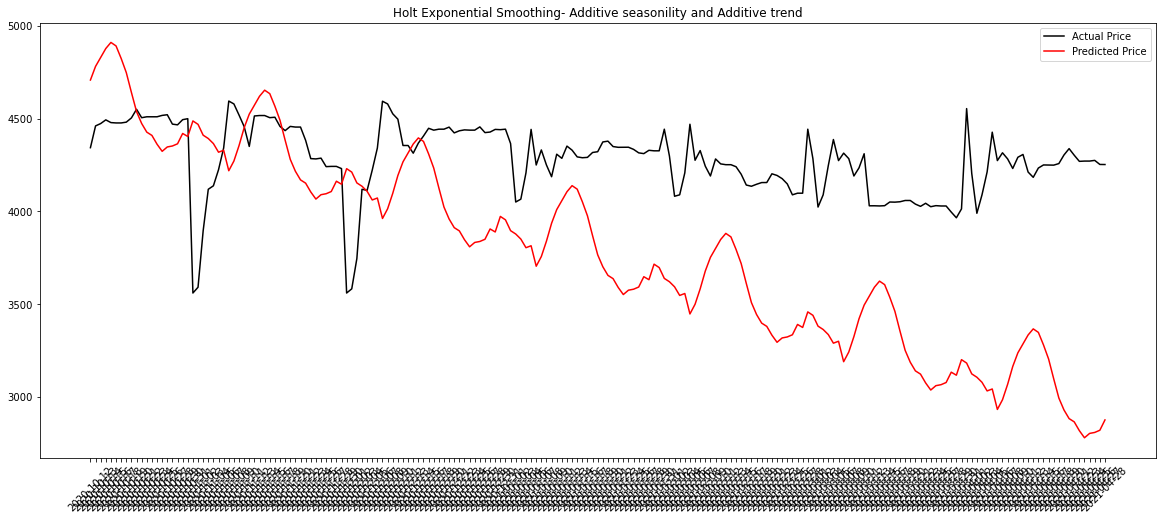

In [122]:
plt.figure(figsize=(20,8))
plt.title("Holt Exponential Smoothing- Additive seasonility and Additive trend")
plt.xticks(rotation=45)
plt.plot(test.price[1:200], color='black',label='Actual Price')
plt.plot(pred_hwe_add_add.values[1:200],color='red', label='Predicted Price')
plt.legend()

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [123]:
hwe_model_mul_add = ExponentialSmoothing(train["price"],seasonal="mul",trend="add",seasonal_periods=30).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_mul_add,test.price)

0.3529108756377717

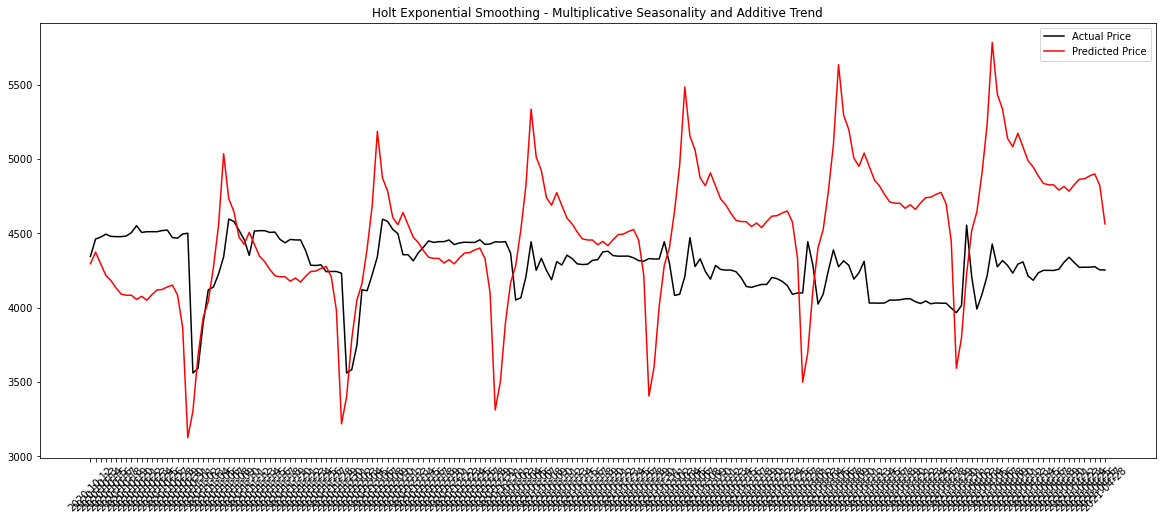

In [124]:
plt.figure(figsize=(20,8))
plt.title("Holt Exponential Smoothing - Multiplicative Seasonality and Additive Trend")
plt.xticks(rotation=45)
plt.plot(test.price[1:200], color='black',label='Actual Price')
plt.plot(pred_hwe_mul_add.values[1:200],color='red', label='Predicted Price')
plt.legend()